In [1]:
%pylab inline
import pandas as pd
from IPython.display import display, HTML


Populating the interactive namespace from numpy and matplotlib


In [2]:
import fastparquet
reload(fastparquet)

<module 'fastparquet' from '/home/spark/anaconda2/lib/python2.7/site-packages/fastparquet/__init__.pyc'>

In [3]:
%time data = pd.read_csv('../input/targets_processed_v2.csv',index_col=0,header=None)

CPU times: user 11.5 s, sys: 1.31 s, total: 12.8 s
Wall time: 12.8 s


In [4]:
data.columns=[ u'customer_id', u'market', u'date', u'target', u'age',
       u'latest_target', u'count', u'freq', u'latest3_mean',
       u'changed_count', u'latest2_change', u'latest2_mean']
data.index.name='id'

In [5]:
data.head()

customer_id    market  date  target  age  latest_target   count  \
id                                                                           
14591391  203500995564  4.494233     1      14    0        -9999.0 -9999.0   
14153077  203500995564  4.494233     2      14    1           14.0     1.0   
13700293  203500995564  4.494233     3      13    2           14.0     2.0   
417032    203500995564  4.494233    12      -1   11           13.0     3.0   
513869    129838369362  4.266003    13      -1    0        -9999.0 -9999.0   

                 freq  latest3_mean  changed_count  latest2_change  \
id                                                                   
14591391 -9999.000000       -9999.0        -9999.0         -9999.0   
14153077     1.000000       -9999.0            0.0         -9999.0   
13700293     1.000000       -9999.0            0.0             0.0   
417032       0.272727         137.0            1.0            -1.0   
513869   -9999.000000       -9999.0        -9999.0         -9999.0   

          latest2_mean  
id                      
14591391       -9999.0  
14153077       -9999.0  
13700293         140.0  
417032           135.0  
513869         -9999.0

In [6]:
data.shape

(6582476, 12)

In [7]:
from IPython.core.display import display, HTML

In [8]:
train=data[data['target']!=-1]
train.shape

(5203955, 12)

In [9]:
test=data[data['target']==-1]
test.shape

(1378521, 12)

In [10]:
for col in train.columns:
    if col in ['customer_id','target']: continue
    a=train[col].value_counts()
    a=a/float(a.sum())
    b=test[col].value_counts()
    b=b/float(b.sum())
    df=pd.concat([a,b],axis=1)
    print col
    display(df)

market


market    market
3.981910  0.050955  0.047309
4.087867  0.012348  0.033678
4.193055  0.027580  0.025502
4.227258  0.044549  0.038315
4.266003  0.035349  0.029699
4.298688  0.048704  0.045154
4.314092  0.032966  0.028259
4.389747  0.111164  0.083071
4.452262  0.035355  0.018821
4.494233  0.029672  0.018436
4.558214  0.013767  0.029973
4.579967  0.028574  0.018677
4.596647  0.019048  0.041582
4.600824  0.066564  0.061520
4.615890  0.027280  0.005675
4.641039  0.027991  0.014765
4.658483  0.079309  0.114086
4.659936  0.027084  0.041126
4.699895  0.037783  0.025442
4.738487  0.019703  0.030475
4.751840  0.014387  0.005131
4.753313  0.051782  0.059104
5.116831  0.077957  0.071366
5.310967  0.053421  0.031485
5.553435  0.026709  0.081350

date


date      date
0   0.089206       NaN
1   0.081920       NaN
2   0.088153       NaN
3   0.084892       NaN
4   0.082932       NaN
5   0.083000       NaN
6   0.080822       NaN
7   0.078204       NaN
8   0.080826       NaN
9   0.081155       NaN
10  0.084106       NaN
11  0.084785       NaN
12       NaN  0.317792
13       NaN  0.311490
14       NaN  0.313884
15       NaN  0.056835

age


age       age
0   0.439077  0.203942
1   0.118447  0.022127
2   0.129394  0.031680
3   0.113944  0.131328
4   0.101159  0.111624
5   0.030521  0.039402
6   0.063832  0.039389
7   0.001337  0.019477
8   0.001106  0.083171
9   0.000868  0.081978
10  0.000184  0.038586
11  0.000131  0.197294

latest_target


latest_target  latest_target
-9999.0       0.439077       0.229140
 0.0          0.004382       0.006318
 1.0          0.079191       0.096871
 2.0          0.073992       0.098146
 3.0          0.064336       0.087706
 4.0          0.052622       0.073023
 5.0          0.076289       0.107131
 6.0          0.049968       0.069725
 7.0          0.058846       0.083941
 8.0          0.032418       0.046447
 9.0          0.032167       0.046880
 10.0         0.014639       0.021681
 11.0         0.007626       0.011227
 12.0         0.008106       0.012208
 13.0         0.004165       0.006241
 14.0         0.001955       0.002995
 15.0         0.000107       0.000162
 16.0         0.000067       0.000102
 17.0         0.000031       0.000031
 18.0         0.000014       0.000020
 20.0         0.000003       0.000006

count


count     count
-9999.0  4.390774e-01  0.203942
 1.0     2.376498e-01  0.172020
 2.0     1.377933e-01  0.182945
 3.0     9.381153e-02  0.129043
 4.0     5.514613e-02  0.075894
 5.0     3.454046e-02  0.064597
 6.0     1.016342e-03  0.125484
 7.0     5.547704e-04  0.034475
 8.0     2.859364e-04  0.010540
 9.0     1.216383e-04  0.000596
 10.0    2.305938e-06  0.000432
 11.0    3.843231e-07  0.000033

freq


freq      freq
-9999.000000  4.390774e-01  0.203942
 0.066667              NaN  0.000001
 0.071429              NaN  0.000012
 0.076923              NaN  0.000030
 0.083333              NaN  0.008248
 0.090909     7.686462e-06  0.005409
 0.100000     2.728694e-05  0.007047
 0.111111     3.285962e-05  0.008101
 0.125000     5.572685e-05  0.009971
 0.133333              NaN  0.000002
 0.142857     8.243730e-05  0.002275
 0.153846              NaN  0.000061
 0.166667     3.538655e-03  0.028364
 0.181818     1.863967e-05  0.007568
 0.200000     3.772515e-03  0.013256
 0.214286              NaN  0.000044
 0.222222     5.918575e-05  0.008727
 0.230769              NaN  0.000067
 0.250000     1.257102e-02  0.043894
 0.266667              NaN  0.000008
 0.272727     1.479644e-05  0.007695
 0.285714     1.543057e-04  0.003510
 0.300000     2.382803e-05  0.005780
 0.307692              NaN  0.000097
 0.333333     3.050622e-02  0.074405
 0.357143              NaN  0.000067
 0.363636     1.614157e-05  0.006881
 0.375000     1.323993e-04  0.007121
 0.384615              NaN  0.000075
 0.400000     5.490247e-03  0.011061
...                    ...       ...
 0.571429     2.221387e-04  0.003745
 0.583333              NaN  0.000968
 0.600000     6.881689e-03  0.008268
 0.615385              NaN  0.000062
 0.625000     1.564195e-04  0.012505
 0.636364     1.979264e-05  0.000123
 0.642857              NaN  0.000041
 0.666667     6.387123e-02  0.109528
 0.692308              NaN  0.000045
 0.700000     4.227554e-06  0.002159
 0.714286     2.286722e-04  0.003164
 0.727273     2.882423e-06  0.000090
 0.733333              NaN  0.000011
 0.750000     4.062487e-02  0.101845
 0.769231              NaN  0.000007
 0.777778     1.362425e-04  0.030261
 0.785714              NaN  0.000003
 0.800000     1.403567e-02  0.029437
 0.818182     9.608077e-07  0.000059
 0.833333     3.356601e-02  0.006122
 0.846154              NaN  0.000004
 0.857143     2.553827e-04  0.003405
 0.875000     1.764043e-04  0.000691
 0.888889     1.256736e-04  0.000004
 0.900000     1.921615e-06  0.000002
 0.909091     5.764846e-07  0.000002
 0.916667              NaN  0.000007
 0.923077              NaN  0.000001
 0.928571              NaN  0.000001
 1.000000     2.407156e-01  0.024182

[71 rows x 2 columns]

latest3_mean


latest3_mean  latest3_mean
-9999.0  8.145205e-01  6.504623e-01
 0.0     1.072261e-04  1.994892e-04
 3.0     1.112615e-04  2.118212e-04
 7.0     3.038074e-04  6.601278e-04
 10.0    8.469712e-03  1.515827e-02
 13.0    5.241782e-03  9.886683e-03
 17.0    6.256011e-03  1.178292e-02
 20.0    8.116903e-03  1.500449e-02
 23.0    8.000454e-03  1.476437e-02
 27.0    8.164752e-03  1.535704e-02
 30.0    8.768715e-03  1.629355e-02
 33.0    8.511603e-03  1.608318e-02
 37.0    8.631896e-03  1.627324e-02
 40.0    8.683780e-03  1.638423e-02
 43.0    8.707416e-03  1.651480e-02
 47.0    8.838662e-03  1.662506e-02
 50.0    9.200310e-03  1.672009e-02
 53.0    8.279472e-03  1.528014e-02
 57.0    7.731235e-03  1.460043e-02
 60.0    7.285420e-03  1.368713e-02
 63.0    6.862281e-03  1.299001e-02
 67.0    6.429917e-03  1.218480e-02
 70.0    6.172805e-03  1.165162e-02
 73.0    5.270991e-03  9.967929e-03
 77.0    4.664145e-03  8.992971e-03
 80.0    4.092656e-03  7.906300e-03
 83.0    3.642998e-03  7.201196e-03
 87.0    3.213902e-03  6.165303e-03
 90.0    2.883384e-03  5.661140e-03
 93.0    2.300558e-03  4.476537e-03
 97.0    1.845327e-03  3.590080e-03
 100.0   1.512888e-03  3.038039e-03
 103.0   1.262886e-03  2.462784e-03
 107.0   1.063038e-03  2.077589e-03
 110.0   9.085398e-04  1.842554e-03
 113.0   7.786386e-04  1.539331e-03
 117.0   6.775616e-04  1.310825e-03
 120.0   6.020421e-04  1.199111e-03
 123.0   4.909727e-04  9.648021e-04
 127.0   3.885506e-04  7.899771e-04
 130.0   3.322473e-04  6.289349e-04
 133.0   2.167582e-04  4.882044e-04
 137.0   1.721767e-04  3.685109e-04
 140.0   1.852437e-04  3.627076e-04
 143.0   3.996960e-05  8.197191e-05
 147.0   1.902399e-05  3.481993e-05
 150.0   1.345131e-05  2.393870e-05
 153.0   8.839431e-06  1.305747e-05
 157.0   4.611877e-06  7.254151e-06
 160.0   3.651069e-06  7.979567e-06
 163.0   2.113777e-06  7.254151e-06
 167.0   2.690262e-06  5.803321e-06
 170.0   1.921615e-06  2.901661e-06
 173.0   1.921615e-07  1.450830e-06
 177.0   9.608077e-07  2.176245e-06
 180.0   9.608077e-07           NaN
 200.0   1.921615e-07  7.254151e-07

changed_count


changed_count  changed_count
-9999.0   4.390774e-01       0.203942
 0.0      2.946323e-01       0.295553
 1.0      1.412618e-01       0.210271
 2.0      7.823838e-02       0.090780
 3.0      3.477855e-02       0.087639
 4.0      1.092957e-02       0.073819
 5.0      6.306742e-04       0.036347
 6.0      3.036152e-04       0.000868
 7.0      1.210618e-04       0.000477
 8.0      2.613397e-05       0.000230
 9.0      5.764846e-07       0.000073
 10.0              NaN       0.000002

latest2_change


latest2_change  latest2_change
-9999.0    6.767272e-01    4.120822e-01
-20.0      5.764846e-07    1.450830e-06
-18.0      2.690262e-06    3.627076e-06
-17.0      1.537292e-06             NaN
-16.0      3.266746e-06             NaN
-15.0      2.113777e-06    7.254151e-06
-14.0      1.960048e-05    3.481993e-05
-13.0      3.766366e-05    6.891444e-05
-12.0      8.224514e-05    1.537880e-04
-11.0      1.329758e-04    2.285058e-04
-10.0      1.898556e-04    3.656092e-04
-9.0       3.727934e-04    6.231316e-04
-8.0       7.394376e-04    1.355075e-03
-7.0       1.202739e-03    2.205262e-03
-6.0       2.343026e-03    4.377155e-03
-5.0       3.953147e-03    7.304930e-03
-4.0       7.874780e-03    1.454748e-02
-3.0       1.452799e-02    2.687591e-02
-2.0       2.923719e-02    5.359294e-02
-1.0       5.598626e-02    1.018671e-01
 0.0       9.515955e-02    1.672220e-01
 1.0       5.412441e-02    9.893792e-02
 2.0       2.780712e-02    5.196439e-02
 3.0       1.382910e-02    2.599670e-02
 4.0       7.315590e-03    1.400849e-02
 5.0       3.652991e-03    6.986473e-03
 6.0       2.142793e-03    4.242228e-03
 7.0       1.111462e-03    2.147954e-03
 8.0       6.602670e-04    1.239009e-03
 9.0       3.284041e-04    6.818902e-04
 10.0      1.773651e-04    3.409451e-04
 11.0      1.149126e-04    2.800102e-04
 12.0      7.820975e-05    1.537880e-04
 13.0      3.343611e-05    6.020946e-05
 14.0      1.902399e-05    2.829119e-05
 15.0      1.152969e-06    1.450830e-06
 16.0      2.882423e-06    9.430397e-06
 17.0      1.537292e-06    7.254151e-07
 18.0      1.729454e-06    2.901661e-06
 20.0      9.608077e-07             NaN

latest2_mean


latest2_mean  latest2_mean
-9999.0  6.767272e-01      0.412082
 0.0     4.413951e-04      0.000736
 5.0     9.020063e-04      0.001654
 10.0    2.255861e-02      0.034282
 15.0    1.685891e-02      0.028296
 20.0    2.176883e-02      0.037798
 25.0    2.031340e-02      0.036294
 30.0    2.176018e-02      0.039553
 35.0    2.131648e-02      0.039203
 40.0    2.163374e-02      0.040160
 45.0    2.098462e-02      0.038855
 50.0    2.282418e-02      0.042004
 55.0    1.914083e-02      0.035557
 60.0    1.828609e-02      0.034303
 65.0    1.617193e-02      0.030100
 70.0    1.606605e-02      0.029882
 75.0    1.239442e-02      0.023297
 80.0    1.084579e-02      0.020531
 85.0    8.809069e-03      0.016872
 90.0    7.924358e-03      0.015269
 95.0    5.537519e-03      0.010725
 100.0   4.012717e-03      0.007734
 105.0   3.160097e-03      0.005995
 110.0   2.478115e-03      0.004907
 115.0   1.893752e-03      0.003655
 120.0   1.749246e-03      0.003428
 125.0   1.268266e-03      0.002468
 130.0   9.473564e-04      0.001874
 135.0   5.657236e-04      0.001106
 140.0   4.996200e-04      0.001077
 145.0   6.860167e-05      0.000142
 150.0   3.881663e-05      0.000065
 155.0   2.017696e-05      0.000040
 160.0   1.364347e-05      0.000022
 165.0   6.533492e-06      0.000013
 170.0   6.149169e-06      0.000012
 175.0   2.305938e-06      0.000003
 180.0   2.498100e-06      0.000004
 190.0   1.921615e-07           NaN
 200.0   5.764846e-07      0.000002

In [13]:
test=data[(data['target']==-1) & (data['date']==12)]
test.shape

(438083, 12)

In [14]:
for col in train.columns:
    if col in ['customer_id','target']: continue
    a=train[col].value_counts()
    a=a/float(a.sum())
    b=test[col].value_counts()
    b=b/float(b.sum())
    df=pd.concat([a,b],axis=1)
    print col
    display(df)

market


market    market
3.981910  0.050955  0.047283
4.087867  0.012348       NaN
4.193055  0.027580  0.013997
4.227258  0.044549  0.048441
4.266003  0.035349  0.058991
4.298688  0.048704  0.052816
4.314092  0.032966  0.059427
4.389747  0.111164  0.162832
4.452262  0.035355  0.026655
4.494233  0.029672  0.041725
4.558214  0.013767       NaN
4.579967  0.028574  0.058770
4.596647  0.019048  0.007761
4.600824  0.066564  0.066446
4.615890  0.027280  0.017857
4.641039  0.027991  0.034667
4.658483  0.079309       NaN
4.659936  0.027084  0.033080
4.699895  0.037783  0.045101
4.738487  0.019703  0.004540
4.751840  0.014387  0.016145
4.753313  0.051782  0.039915
5.116831  0.077957  0.106827
5.310967  0.053421  0.041773
5.553435  0.026709  0.014949

date


date  date
0   0.089206   NaN
1   0.081920   NaN
2   0.088153   NaN
3   0.084892   NaN
4   0.082932   NaN
5   0.083000   NaN
6   0.080822   NaN
7   0.078204   NaN
8   0.080826   NaN
9   0.081155   NaN
10  0.084106   NaN
11  0.084785   NaN
12       NaN   1.0

age


age       age
0   0.439077  0.191290
1   0.118447  0.000123
2   0.129394  0.000237
3   0.113944  0.000536
4   0.101159  0.000712
5   0.030521  0.001105
6   0.063832  0.033777
7   0.001337  0.003942
8   0.001106  0.035256
9   0.000868  0.045425
10  0.000184  0.072831
11  0.000131  0.614765

latest_target


latest_target  latest_target
-9999.0       0.439077       0.191290
 0.0          0.004382       0.007544
 1.0          0.079191       0.109876
 2.0          0.073992       0.106147
 3.0          0.064336       0.093204
 4.0          0.052622       0.076497
 5.0          0.076289       0.110714
 6.0          0.049968       0.071361
 7.0          0.058846       0.085027
 8.0          0.032418       0.046783
 9.0          0.032167       0.046966
 10.0         0.014639       0.021284
 11.0         0.007626       0.011464
 12.0         0.008106       0.012235
 13.0         0.004165       0.006268
 14.0         0.001955       0.003034
 15.0         0.000107       0.000146
 16.0         0.000067       0.000100
 17.0         0.000031       0.000039
 18.0         0.000014       0.000016
 20.0         0.000003       0.000005

count


count     count
-9999.0  4.390774e-01  0.191290
 1.0     2.376498e-01  0.140923
 2.0     1.377933e-01  0.115451
 3.0     9.381153e-02  0.102357
 4.0     5.514613e-02  0.097746
 5.0     3.454046e-02  0.107541
 6.0     1.016342e-03  0.235770
 7.0     5.547704e-04  0.003805
 8.0     2.859364e-04  0.002367
 9.0     1.216383e-04  0.001543
 10.0    2.305938e-06  0.001182
 11.0    3.843231e-07  0.000023

freq


freq      freq
-9999.000000  4.390774e-01  0.191290
 0.083333              NaN  0.025860
 0.090909     7.686462e-06  0.016933
 0.100000     2.728694e-05  0.021510
 0.111111     3.285962e-05  0.019394
 0.125000     5.572685e-05  0.021854
 0.142857     8.243730e-05  0.000591
 0.166667     3.538655e-03  0.073418
 0.181818     1.863967e-05  0.023674
 0.200000     3.772515e-03  0.022503
 0.222222     5.918575e-05  0.014993
 0.250000     1.257102e-02  0.063314
 0.272727     1.479644e-05  0.024034
 0.285714     1.543057e-04  0.000829
 0.300000     2.382803e-05  0.016492
 0.333333     3.050622e-02  0.073349
 0.363636     1.614157e-05  0.021487
 0.375000     1.323993e-04  0.000324
 0.400000     5.490247e-03  0.011783
 0.416667              NaN  0.087134
 0.428571     1.756356e-04  0.000804
 0.444444     9.108457e-05  0.000475
 0.454545     1.383563e-05  0.019088
 0.500000     1.029671e-01  0.235720
 0.545455     3.554988e-05  0.000559
 0.555556     1.091478e-04  0.000336
 0.571429     2.221387e-04  0.001408
 0.583333              NaN  0.003006
 0.600000     6.881689e-03  0.000678
 0.625000     1.564195e-04  0.000187
 0.636364     1.979264e-05  0.000361
 0.666667     6.387123e-02  0.002226
 0.700000     4.227554e-06  0.000263
 0.714286     2.286722e-04  0.000299
 0.727273     2.882423e-06  0.000258
 0.750000     4.062487e-02  0.001529
 0.777778     1.362425e-04  0.000171
 0.800000     1.403567e-02  0.000210
 0.818182     9.608077e-07  0.000180
 0.833333     3.356601e-02  0.001180
 0.857143     2.553827e-04  0.000011
 0.875000     1.764043e-04  0.000005
 0.888889     1.256736e-04       NaN
 0.900000     1.921615e-06       NaN
 0.909091     5.764846e-07  0.000002
 0.916667              NaN  0.000021
 1.000000     2.407156e-01  0.000258

latest3_mean


latest3_mean  latest3_mean
-9999.0  8.145205e-01      0.447664
 0.0     1.072261e-04      0.000354
 3.0     1.112615e-04      0.000317
 7.0     3.038074e-04      0.001039
 10.0    8.469712e-03      0.022279
 13.0    5.241782e-03      0.015344
 17.0    6.256011e-03      0.018487
 20.0    8.116903e-03      0.023792
 23.0    8.000454e-03      0.023690
 27.0    8.164752e-03      0.024495
 30.0    8.768715e-03      0.026331
 33.0    8.511603e-03      0.026070
 37.0    8.631896e-03      0.026342
 40.0    8.683780e-03      0.026575
 43.0    8.707416e-03      0.026299
 47.0    8.838662e-03      0.026395
 50.0    9.200310e-03      0.026703
 53.0    8.279472e-03      0.024413
 57.0    7.731235e-03      0.023361
 60.0    7.285420e-03      0.021309
 63.0    6.862281e-03      0.020193
 67.0    6.429917e-03      0.019145
 70.0    6.172805e-03      0.017997
 73.0    5.270991e-03      0.015643
 77.0    4.664145e-03      0.013904
 80.0    4.092656e-03      0.012347
 83.0    3.642998e-03      0.011302
 87.0    3.213902e-03      0.009637
 90.0    2.883384e-03      0.008601
 93.0    2.300558e-03      0.007127
 97.0    1.845327e-03      0.005588
 100.0   1.512888e-03      0.004741
 103.0   1.262886e-03      0.003871
 107.0   1.063038e-03      0.003287
 110.0   9.085398e-04      0.002906
 113.0   7.786386e-04      0.002500
 117.0   6.775616e-04      0.002155
 120.0   6.020421e-04      0.001897
 123.0   4.909727e-04      0.001461
 127.0   3.885506e-04      0.001237
 130.0   3.322473e-04      0.000954
 133.0   2.167582e-04      0.000753
 137.0   1.721767e-04      0.000582
 140.0   1.852437e-04      0.000582
 143.0   3.996960e-05      0.000142
 147.0   1.902399e-05      0.000066
 150.0   1.345131e-05      0.000043
 153.0   8.839431e-06      0.000023
 157.0   4.611877e-06      0.000016
 160.0   3.651069e-06      0.000014
 163.0   2.113777e-06      0.000009
 167.0   2.690262e-06      0.000005
 170.0   1.921615e-06      0.000009
 173.0   1.921615e-07      0.000005
 177.0   9.608077e-07           NaN
 180.0   9.608077e-07           NaN
 200.0   1.921615e-07      0.000002

changed_count


changed_count  changed_count
-9999.0   4.390774e-01       0.191290
 0.0      2.946323e-01       0.202133
 1.0      1.412618e-01       0.148949
 2.0      7.823838e-02       0.144470
 3.0      3.477855e-02       0.138465
 4.0      1.092957e-02       0.113914
 5.0      6.306742e-04       0.056099
 6.0      3.036152e-04       0.002376
 7.0      1.210618e-04       0.001376
 8.0      2.613397e-05       0.000703
 9.0      5.764846e-07       0.000221
 10.0              NaN       0.000002

latest2_change


latest2_change  latest2_change
-9999.0    6.767272e-01        0.332213
-20.0      5.764846e-07        0.000002
-18.0      2.690262e-06        0.000002
-17.0      1.537292e-06             NaN
-16.0      3.266746e-06             NaN
-15.0      2.113777e-06        0.000007
-14.0      1.960048e-05        0.000039
-13.0      3.766366e-05        0.000107
-12.0      8.224514e-05        0.000210
-11.0      1.329758e-04        0.000269
-10.0      1.898556e-04        0.000457
-9.0       3.727934e-04        0.000845
-8.0       7.394376e-04        0.001671
-7.0       1.202739e-03        0.002700
-6.0       2.343026e-03        0.005440
-5.0       3.953147e-03        0.008791
-4.0       7.874780e-03        0.017380
-3.0       1.452799e-02        0.031286
-2.0       2.923719e-02        0.061128
-1.0       5.598626e-02        0.111433
 0.0       9.515955e-02        0.183410
 1.0       5.412441e-02        0.111296
 2.0       2.780712e-02        0.061014
 3.0       1.382910e-02        0.032268
 4.0       7.315590e-03        0.017430
 5.0       3.652991e-03        0.008969
 6.0       2.142793e-03        0.005485
 7.0       1.111462e-03        0.002589
 8.0       6.602670e-04        0.001598
 9.0       3.284041e-04        0.000840
 10.0      1.773651e-04        0.000447
 11.0      1.149126e-04        0.000329
 12.0      7.820975e-05        0.000215
 13.0      3.343611e-05        0.000087
 14.0      1.902399e-05        0.000030
 15.0      1.152969e-06        0.000005
 16.0      2.882423e-06        0.000005
 17.0      1.537292e-06             NaN
 18.0      1.729454e-06        0.000005
 20.0      9.608077e-07             NaN

latest2_mean


latest2_mean  latest2_mean
-9999.0  6.767272e-01      0.332213
 0.0     4.413951e-04      0.000954
 5.0     9.020063e-04      0.002150
 10.0    2.255861e-02      0.042054
 15.0    1.685891e-02      0.034601
 20.0    2.176883e-02      0.044053
 25.0    2.031340e-02      0.042421
 30.0    2.176018e-02      0.045804
 35.0    2.131648e-02      0.045103
 40.0    2.163374e-02      0.046363
 45.0    2.098462e-02      0.044286
 50.0    2.282418e-02      0.046541
 55.0    1.914083e-02      0.039493
 60.0    1.828609e-02      0.037691
 65.0    1.617193e-02      0.033028
 70.0    1.606605e-02      0.032567
 75.0    1.239442e-02      0.025723
 80.0    1.084579e-02      0.022514
 85.0    8.809069e-03      0.018423
 90.0    7.924358e-03      0.016467
 95.0    5.537519e-03      0.011537
 100.0   4.012717e-03      0.008619
 105.0   3.160097e-03      0.006734
 110.0   2.478115e-03      0.005387
 115.0   1.893752e-03      0.004134
 120.0   1.749246e-03      0.003680
 125.0   1.268266e-03      0.002662
 130.0   9.473564e-04      0.002011
 135.0   5.657236e-04      0.001301
 140.0   4.996200e-04      0.001139
 145.0   6.860167e-05      0.000151
 150.0   3.881663e-05      0.000080
 155.0   2.017696e-05      0.000055
 160.0   1.364347e-05      0.000021
 165.0   6.533492e-06      0.000016
 170.0   6.149169e-06      0.000018
 175.0   2.305938e-06      0.000002
 180.0   2.498100e-06           NaN
 190.0   1.921615e-07           NaN
 200.0   5.764846e-07      0.000002

[-9999, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 200]
-9999


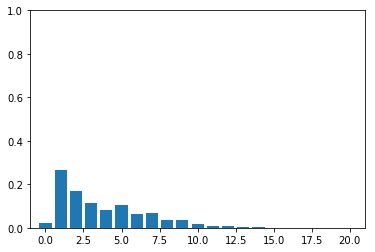

0


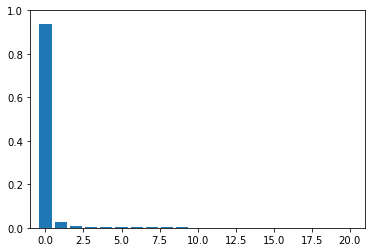

5


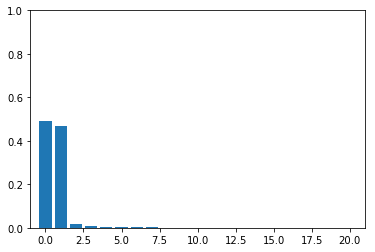

10


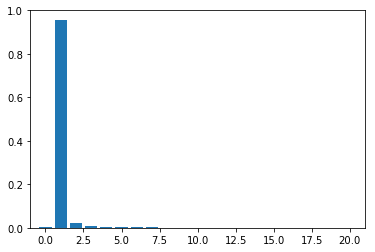

15


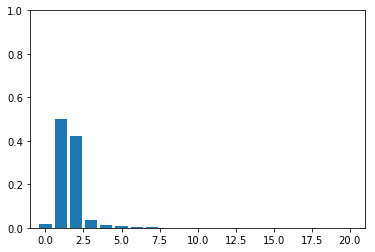

20


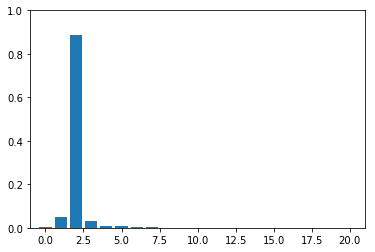

25


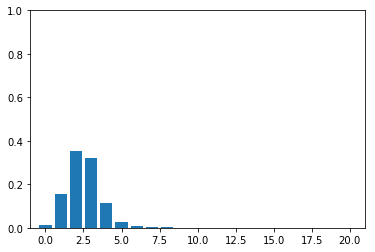

30


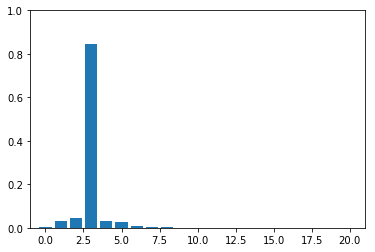

35


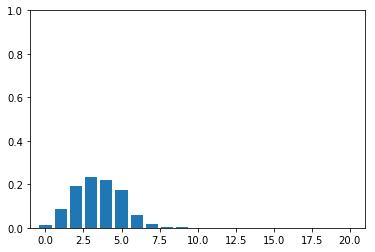

40


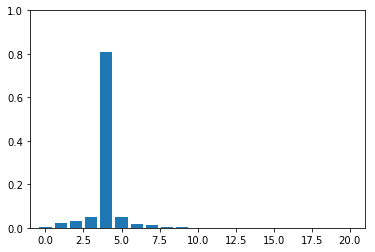

45


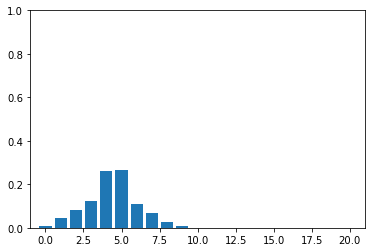

50


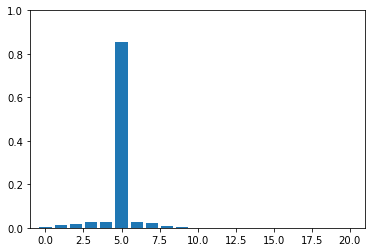

55


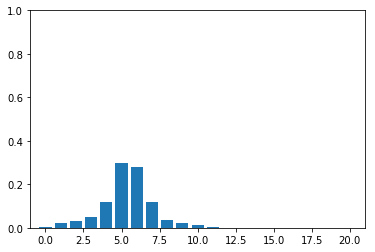

60


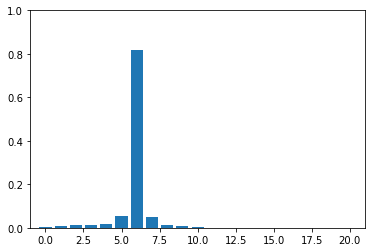

65


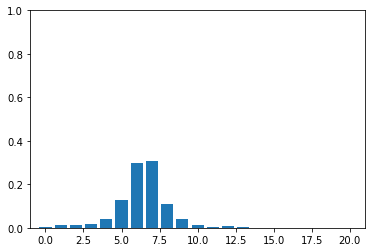

70


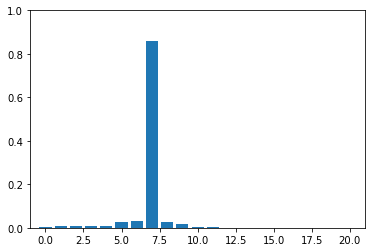

75


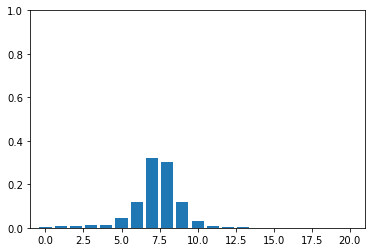

80


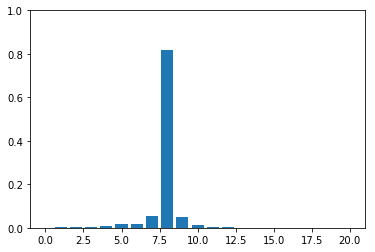

85


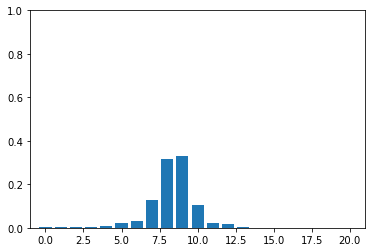

90


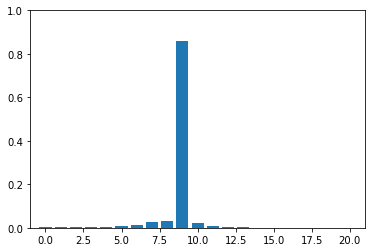

95


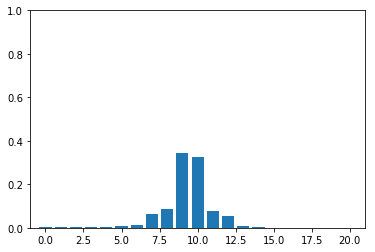

100


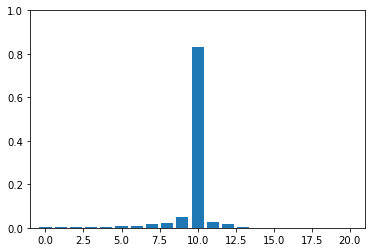

105


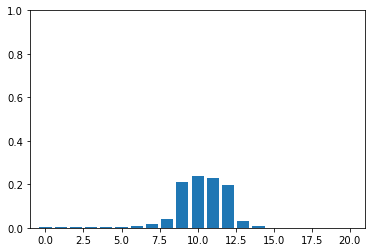

110


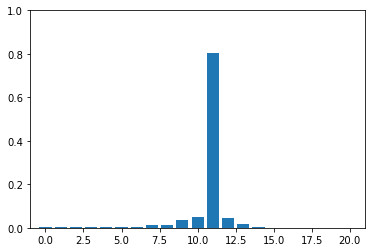

115


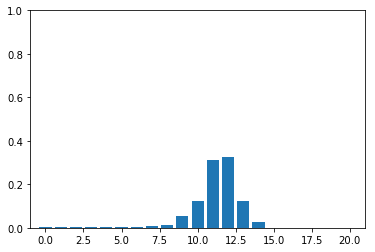

120


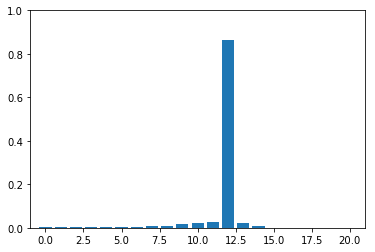

125


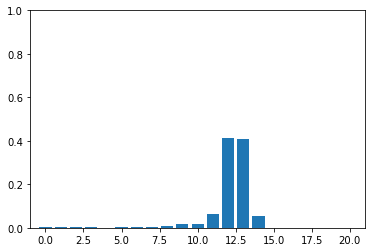

130


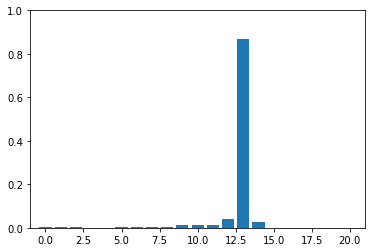

135


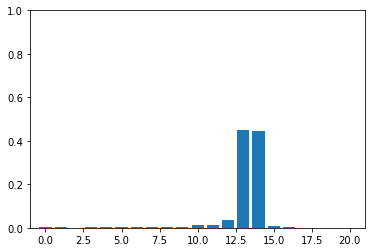

140


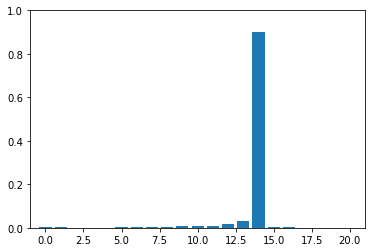

145


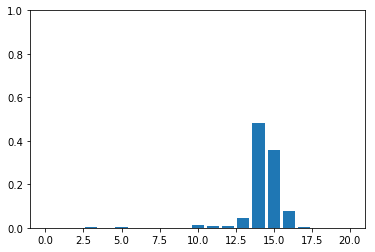

150


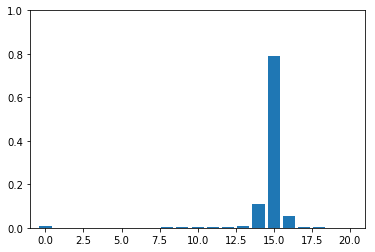

155


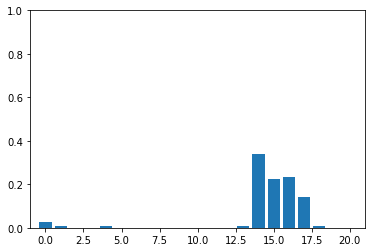

160


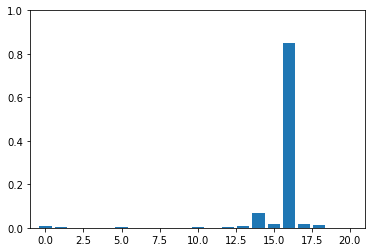

165


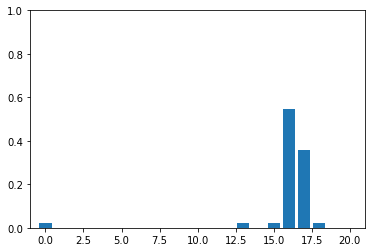

170


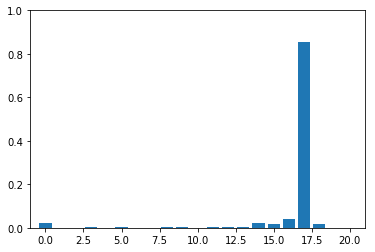

175


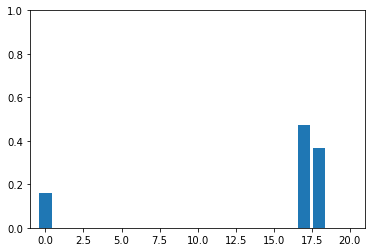

180


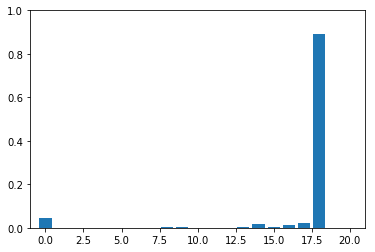

185


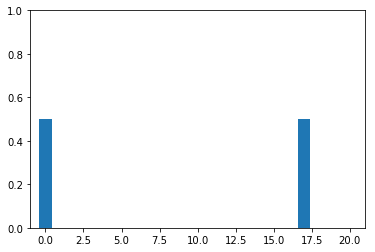

190


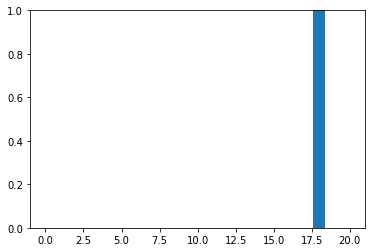

200


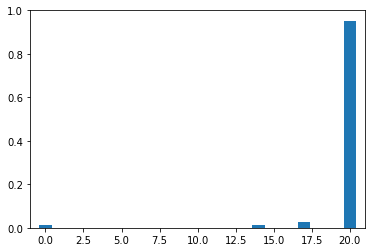

In [25]:
col='latest2_mean'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[-9999, -20, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20]
-9999


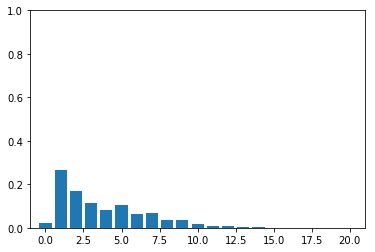

-20


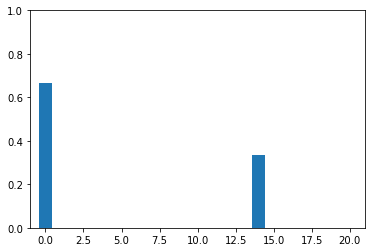

-18


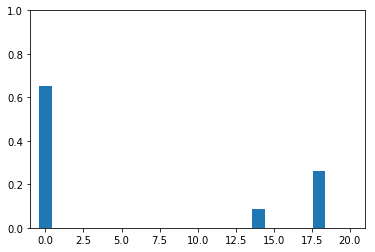

-17


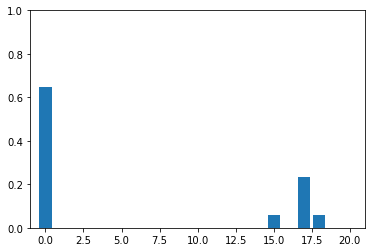

-16


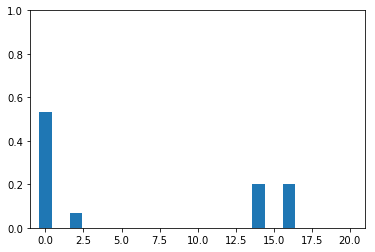

-15


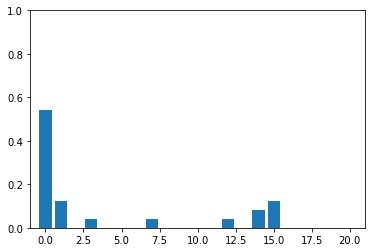

-14


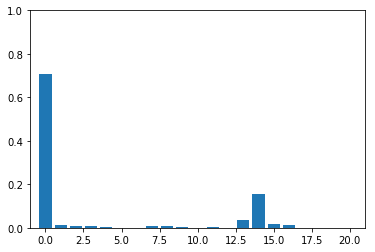

-13


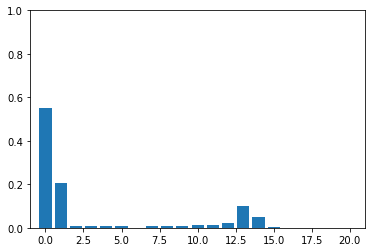

-12


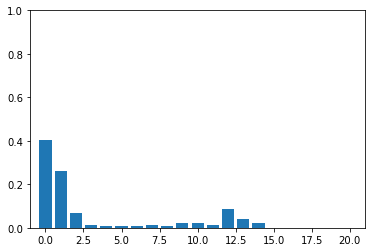

-11


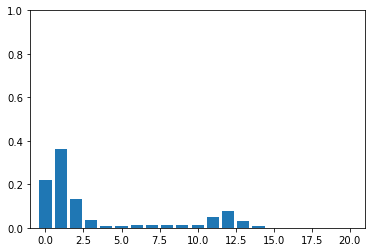

-10


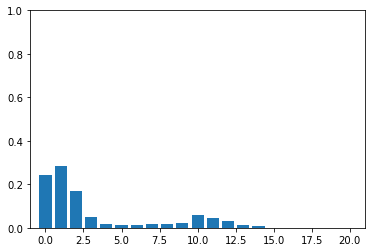

-9


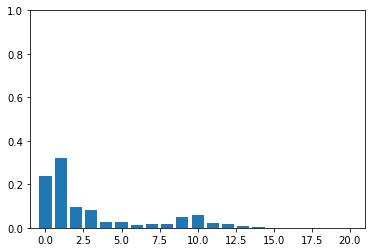

-8


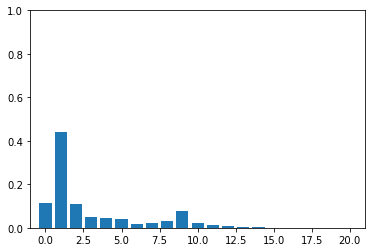

-7


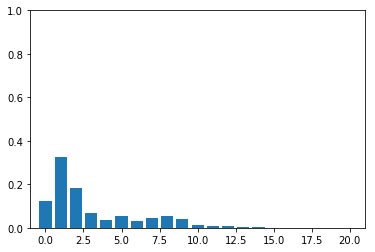

-6


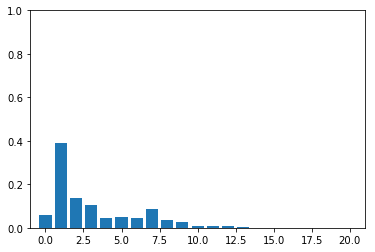

-5


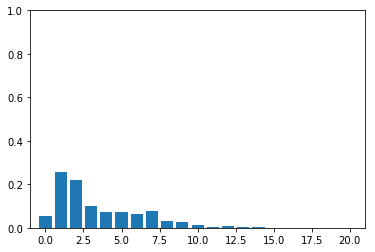

-4


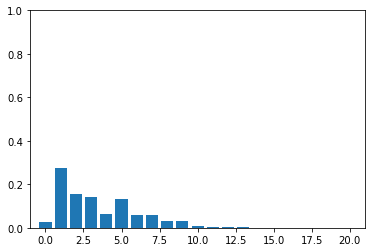

-3


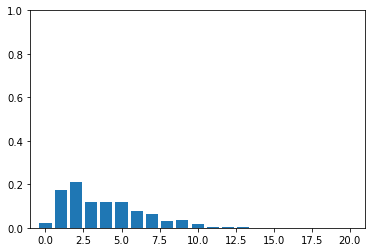

-2


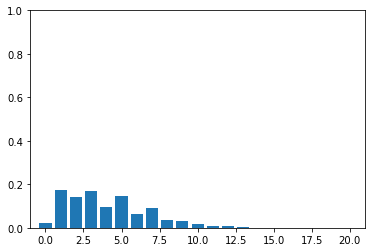

-1


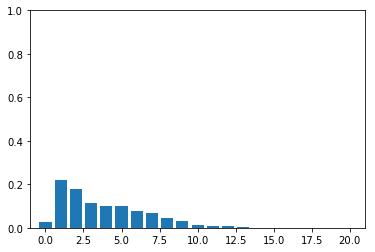

0


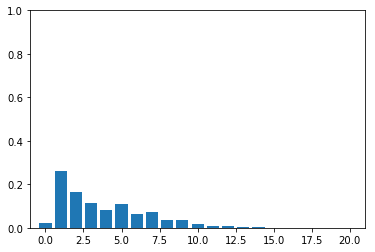

1


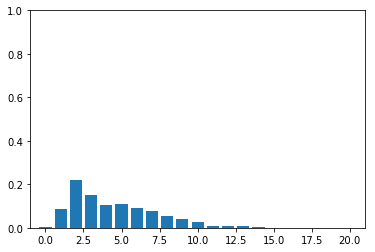

2


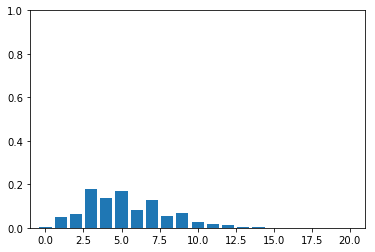

3


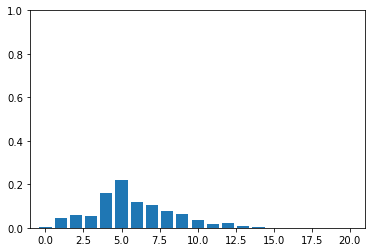

4


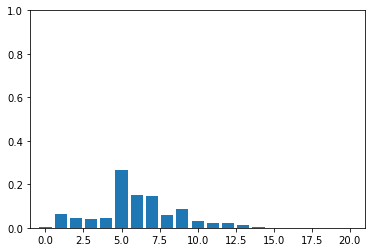

5


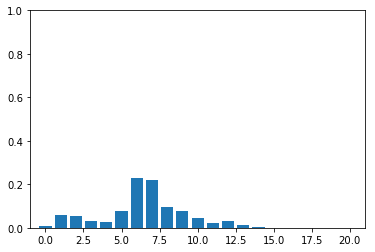

6


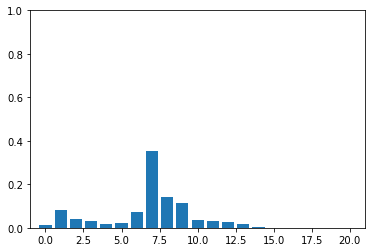

7


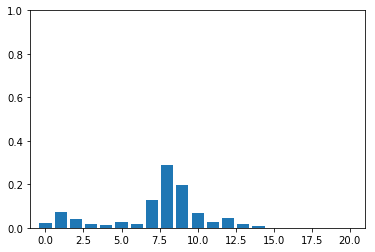

8


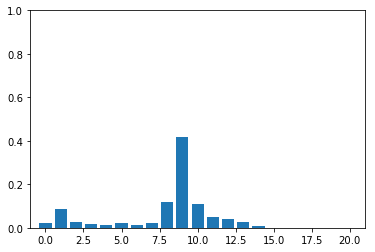

9


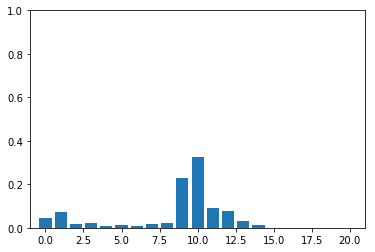

10


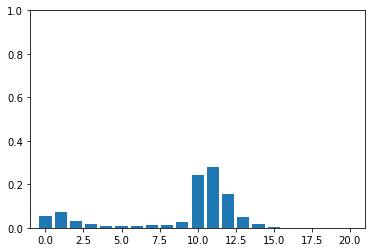

11


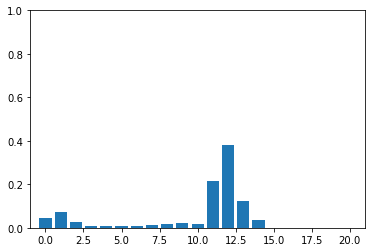

12


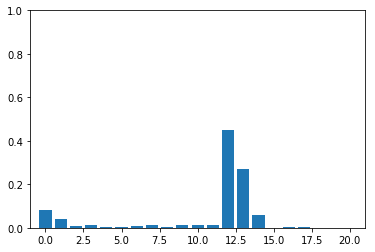

13


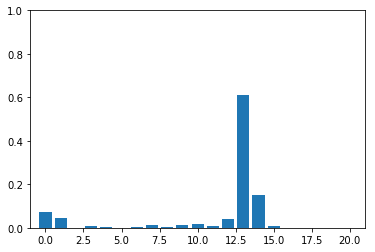

14


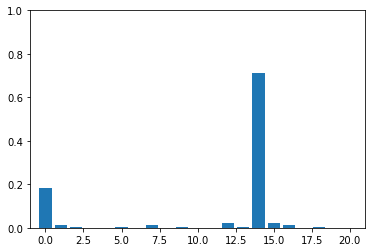

15


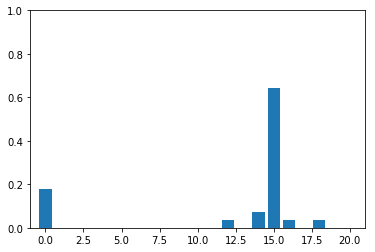

16


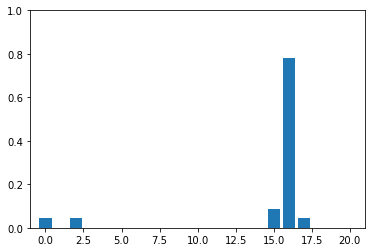

17


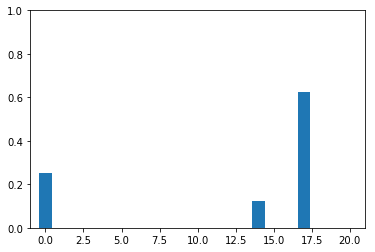

18


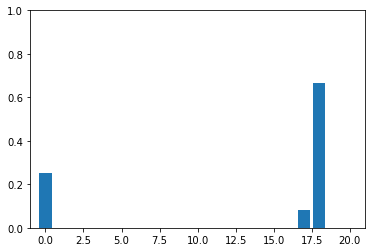

20


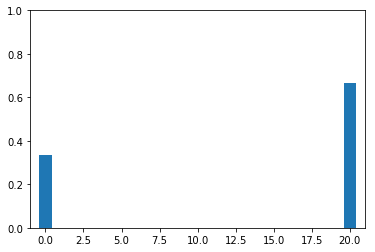

In [23]:
col='latest2_change'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[-9999, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
-9999


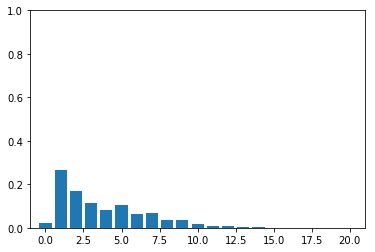

0


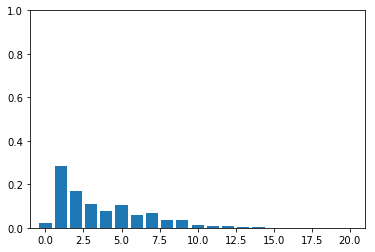

1


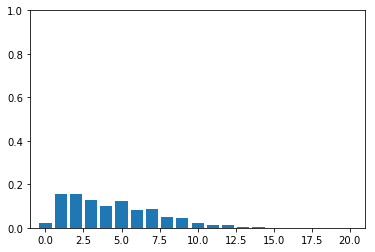

2


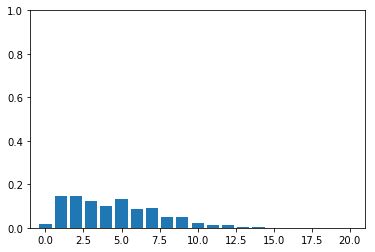

3


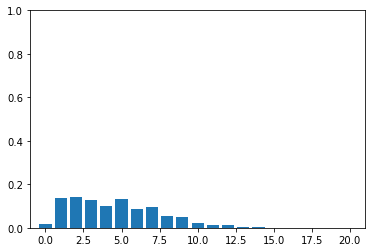

4


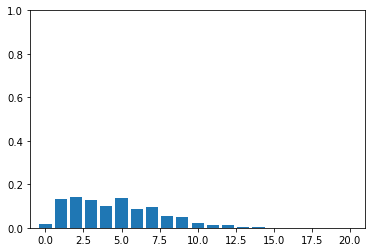

5


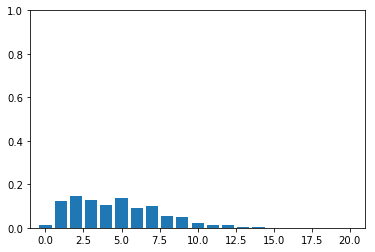

6


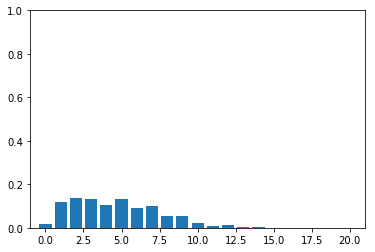

7


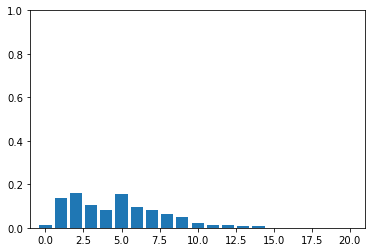

8


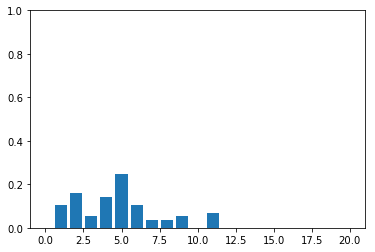

9


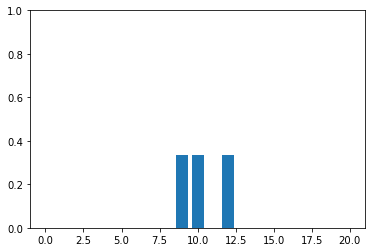

In [22]:
col='changed_count'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[-1000.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
-1000.0


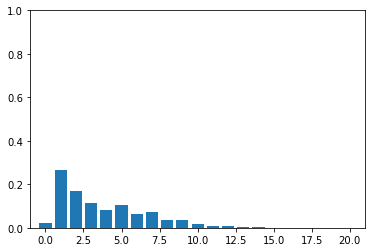

0.0


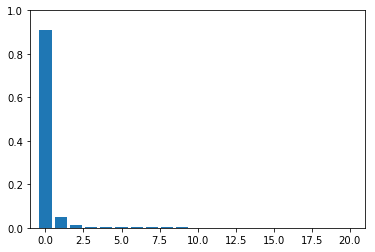

1.0


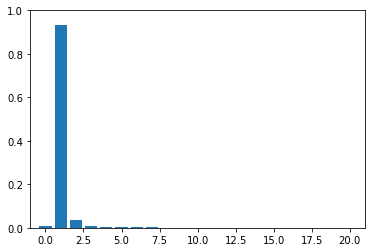

2.0


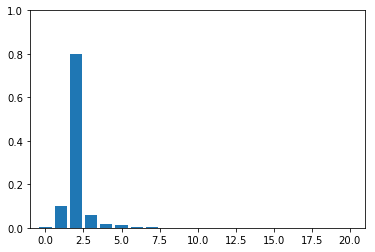

3.0


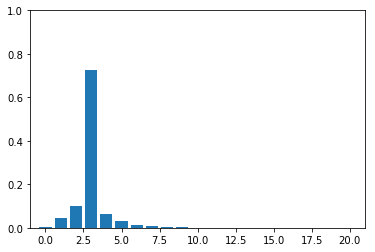

4.0


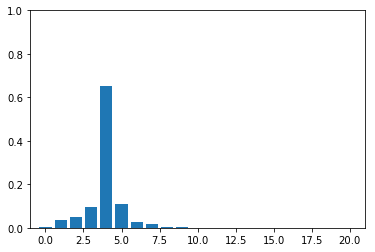

5.0


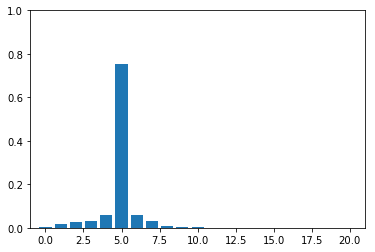

6.0


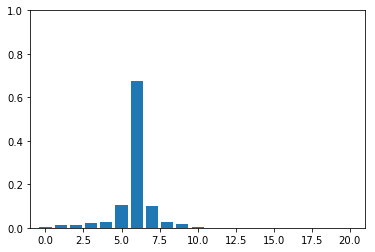

7.0


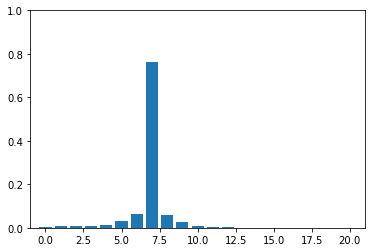

8.0


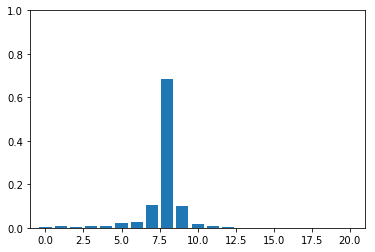

9.0


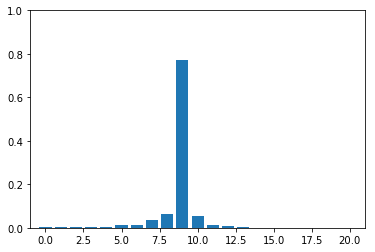

10.0


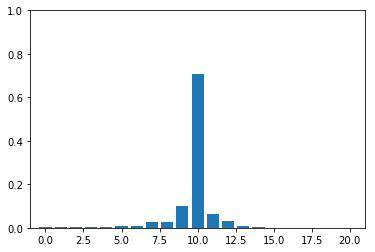

11.0


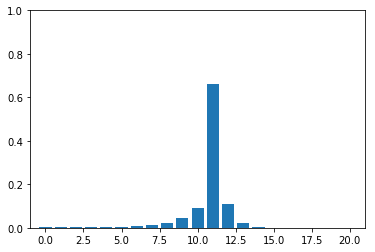

12.0


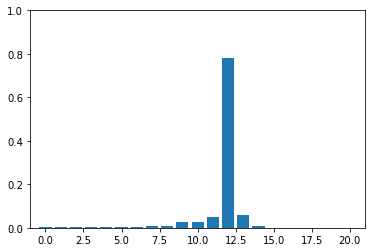

13.0


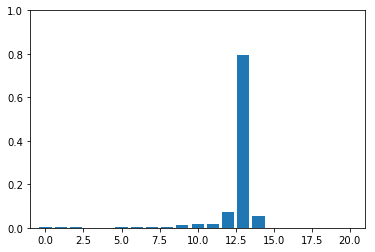

14.0


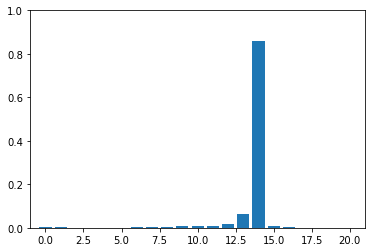

15.0


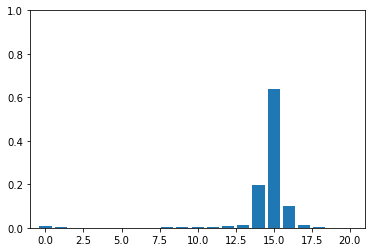

16.0


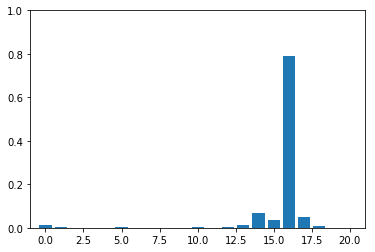

17.0


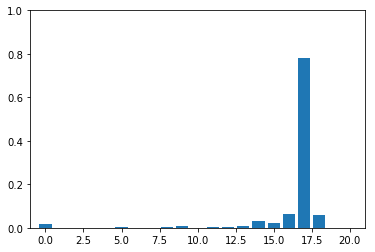

18.0


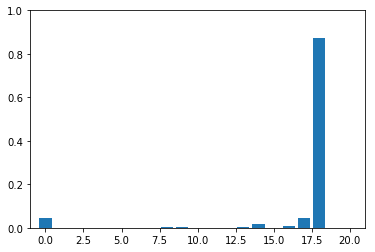

19.0


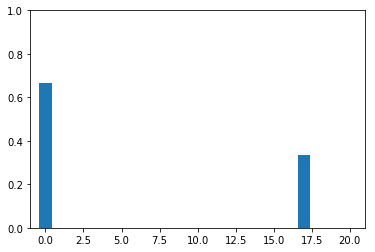

20.0


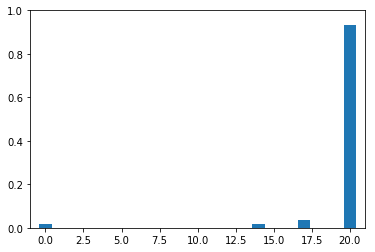

In [21]:
col='latest3_mean'
markets=sorted(list(set(np.round(train[col]/10.0))))
print markets  
for market in markets:
    df=train[np.round(train[col]/10)==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[-9999.0, 0.090909100000000007, 0.10000000000000001, 0.11111099999999999, 0.125, 0.14285699999999998, 0.16666700000000001, 0.18181800000000001, 0.20000000000000001, 0.22222199999999998, 0.25, 0.272727, 0.28571399999999997, 0.29999999999999999, 0.33333299999999999, 0.36363600000000001, 0.375, 0.40000000000000002, 0.42857099999999998, 0.44444399999999995, 0.45454499999999998, 0.5, 0.54545500000000002, 0.55555600000000005, 0.57142899999999996, 0.59999999999999998, 0.625, 0.63636400000000004, 0.66666700000000001, 0.69999999999999996, 0.71428599999999998, 0.72727299999999995, 0.75, 0.77777799999999997, 0.80000000000000004, 0.81818199999999996, 0.83333299999999999, 0.85714299999999999, 0.875, 0.88888899999999993, 0.90000000000000002, 0.90909099999999998, 1.0]
-9999.0
0.0909091
0.1
0.111111
0.125
0.142857
0.166667
0.181818
0.2
0.222222
0.25
0.272727
0.285714
0.3
0.333333
0.363636
0.375
0.4
0.428571
0.444444
0.454545
0.5
0.545455
0.555556
0.571429
0.6
0.625
0.636364
0.666667
0.7
0.714286
0.727

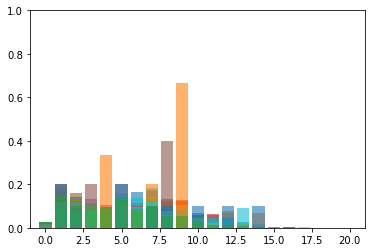

In [15]:
col='freq'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values),alpha=0.6);
    ylim([0,1])
    xlim([-1,21])    
    #plt.show()

[-9999.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]
-9999.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0


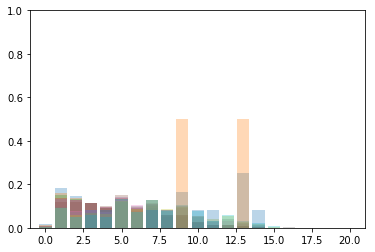

In [16]:
col='count'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values),alpha=0.3);
    ylim([0,1])
    xlim([-1,21])    
    #plt.show()

[-9999.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 20.0]
-9999.0


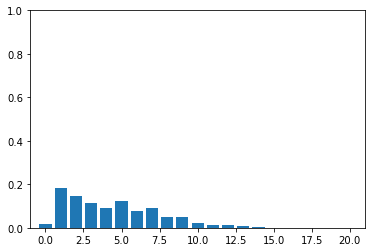

0.0


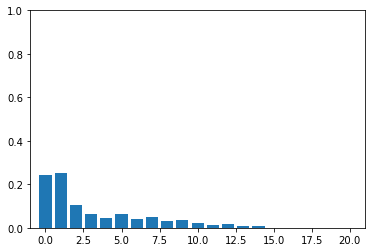

1.0


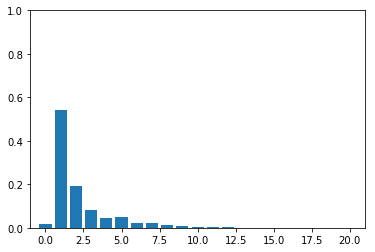

2.0


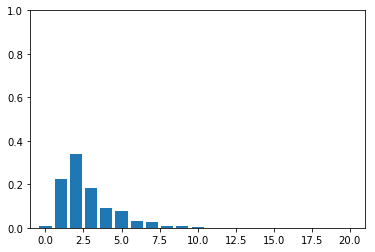

3.0


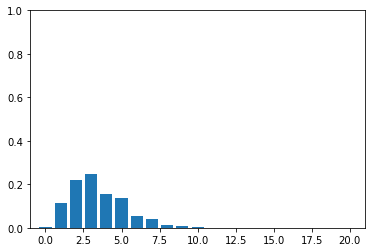

4.0


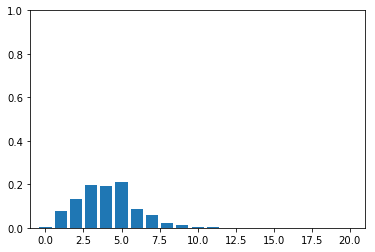

5.0


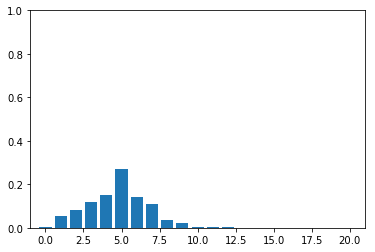

6.0


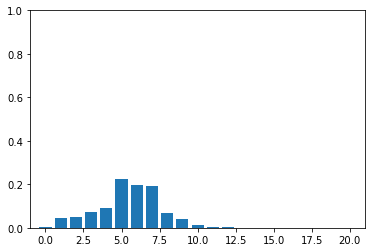

7.0


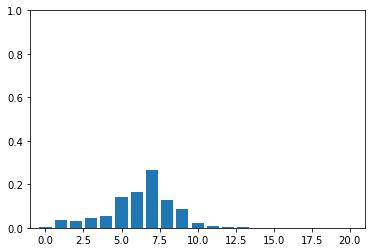

8.0


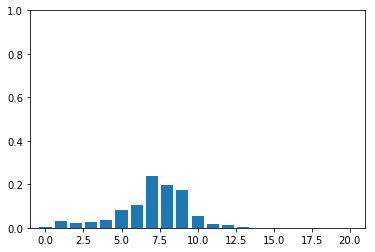

9.0


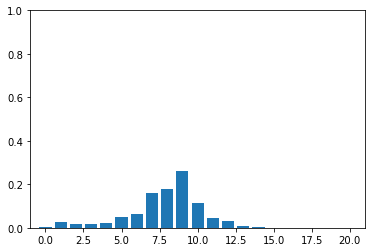

10.0


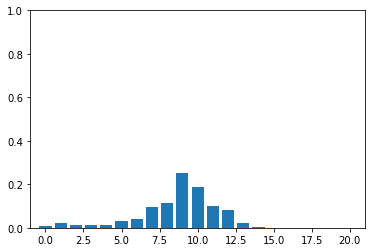

11.0


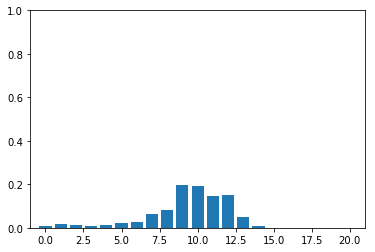

12.0


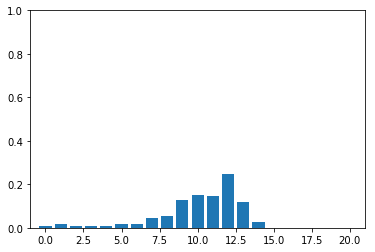

13.0


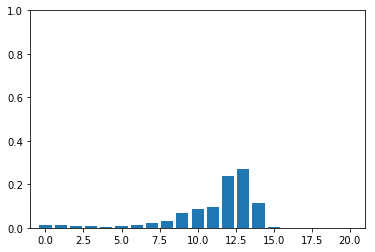

14.0


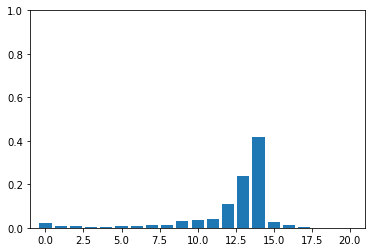

15.0


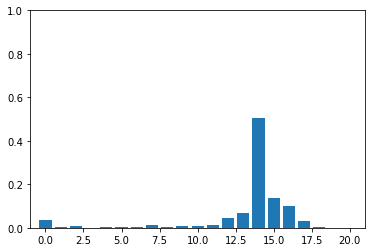

16.0


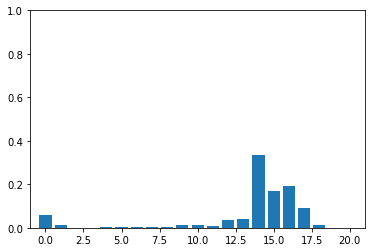

17.0


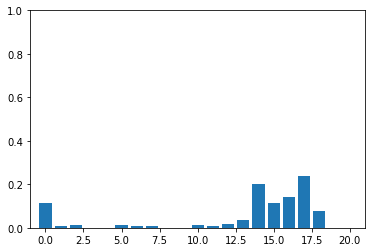

18.0


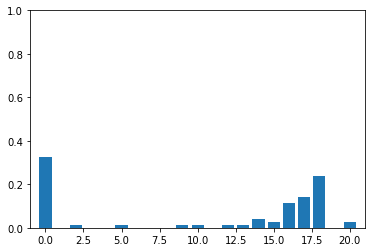

20.0


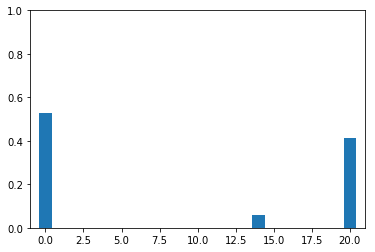

In [20]:
col='latest_target'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values));
    ylim([0,1])
    xlim([-1,21])    
    plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
0
1
2
3
4
5
6
7
8
9
10
11


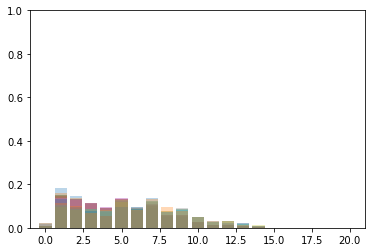

In [21]:
col='age'
markets=sorted(list(set(train[col])))
print markets  
for market in markets:
    df=train[train[col]==market]
    vc=df['target'].value_counts().sort_index() 
    vc=vc/float(vc.sum())
    print  market
    plt.bar(vc.index,(vc.values),alpha=0.3);
    ylim([0,1])
    xlim([-1,21])    
    #plt.show()

In [22]:
train[col].value_counts()

0     2284939
2      673362
1      616392
3      592958
4      526426
6      332179
5      158831
7        6956
8        5753
9        4517
10        959
11        683
Name: age, dtype: int64